In [18]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import geopandas as gpd

In [19]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15, 8)})

In [20]:
enem_df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > 0.01,
    sep=';'
)

In [21]:
enem_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001237805,2019,3118304,Conselheiro Lafaiete,31,MG,22.0,F,1,1,...,B,A,B,C,B,A,E,A,B,B
1,190001199384,2019,1721000,Palmas,17,TO,23.0,M,1,3,...,B,A,A,B,A,A,D,B,B,B
2,190001705264,2019,4203600,Campos Novos,42,SC,21.0,F,1,1,...,B,A,A,D,B,B,D,B,C,B
3,190002037449,2019,5300108,Brasília,53,DF,35.0,M,1,3,...,B,A,A,C,A,B,B,B,A,B
4,190001133241,2019,2304400,Fortaleza,23,CE,21.0,M,1,3,...,B,A,A,B,A,A,E,A,A,B


# Separando as colunas das notas

In [22]:
grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
enem_df[grades].head()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO
0,591.1,592.0,560.0,695.1,540.0
1,437.1,362.1,420.4,397.8,500.0
2,555.8,496.8,482.9,487.4,560.0
3,357.7,519.2,442.4,384.0,500.0
4,568.7,570.6,514.6,537.8,540.0


# Retirando valores nulos 

In [23]:
enem_df[grades].isnull().sum()

NU_NOTA_LC         11516
NU_NOTA_CH         11516
NU_NOTA_CN         13594
NU_NOTA_MT         13594
NU_NOTA_REDACAO    11516
dtype: int64

In [24]:
enem_df.dropna(inplace=True)

# Calculando a média geral de cada candidato

In [25]:
enem_df['NU_NOTA_GERAL'] = enem_df[grades].sum(axis=1) / 5

grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL']

pd.DataFrame(enem_df['NU_NOTA_GERAL'].head(10))

,NU_NOTA_GERAL
5,520.54
6,635.00
11,705.62
13,578.96
15,492.62
26,392.62
28,588.24
32,719.42
40,528.92
47,561.48


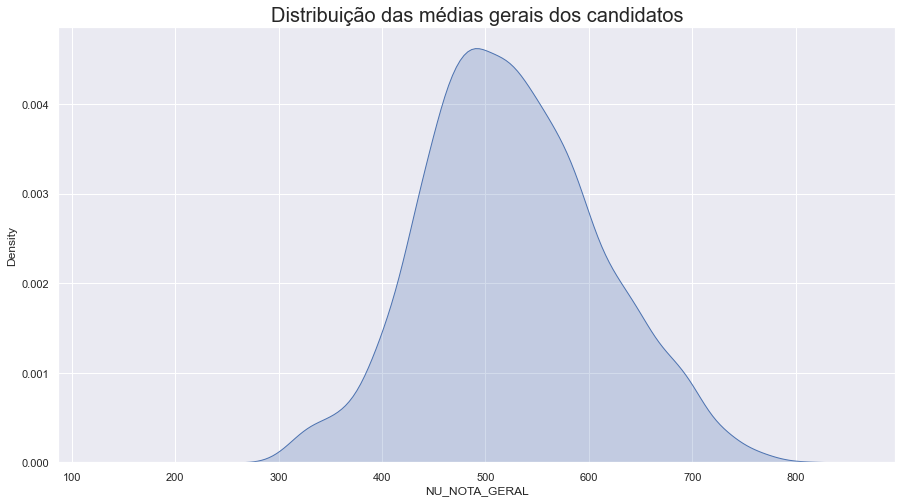

In [52]:
sns.kdeplot(data=enem_df['NU_NOTA_GERAL'], fill=True, palette="rocket")

plt.title('Distribuição das médias gerais dos candidatos', fontsize=20)
plt.show()

 Muito parecido com uma curva de distribuição normal ou Gaussiana!

# Distribuição das notas de cada área do conhecimento

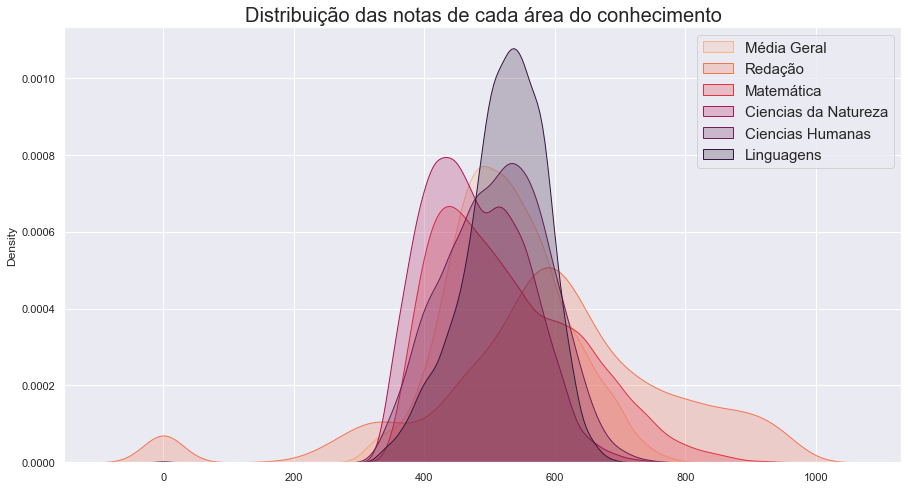

In [62]:
sns.kdeplot(data=enem_df[grades], fill=True, palette="rocket")

plt.legend(['Média Geral', 'Redação', 'Matemática', 'Ciencias da Natureza', 'Ciencias Humanas', 'Linguagens'], fontsize=15)
plt.title('Distribuição das notas de cada área do conhecimento', fontsize=20)
plt.show()

# Comparando as notas de cada área com a média geral

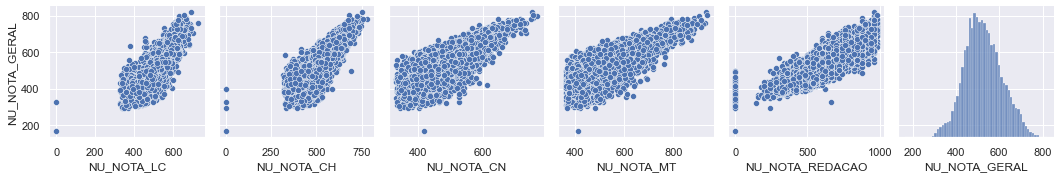

In [61]:
sns.pairplot(enem_df[grades], y_vars='NU_NOTA_GERAL', palette='rocket')
plt.show()

# Comparando o desempenho de cada área com a média geral

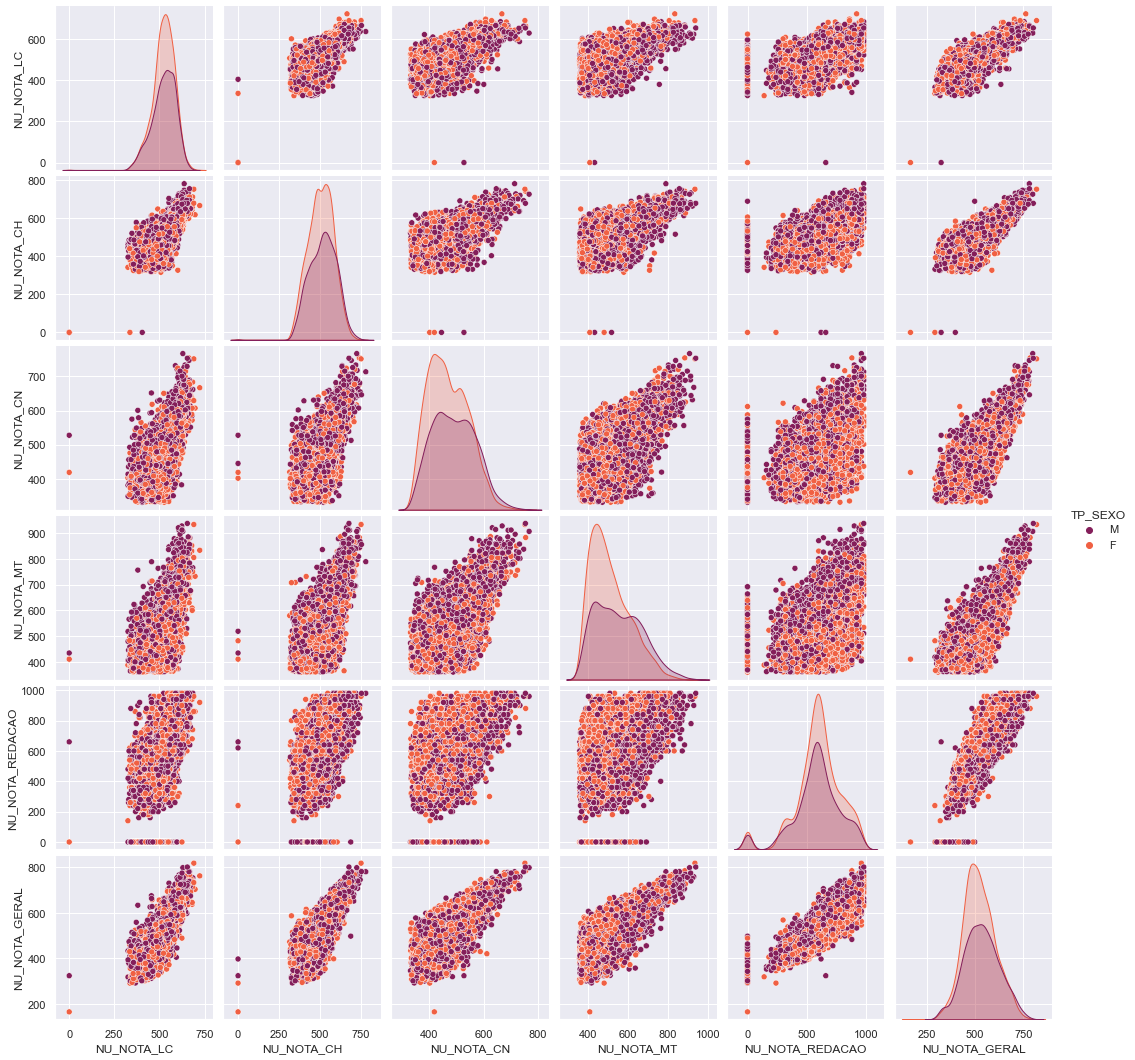

In [59]:
grades = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL', 'TP_SEXO']
sns.pairplot(enem_df[grades], hue='TP_SEXO', palette='rocket')

plt.show()

# Média do desempenho por gênero

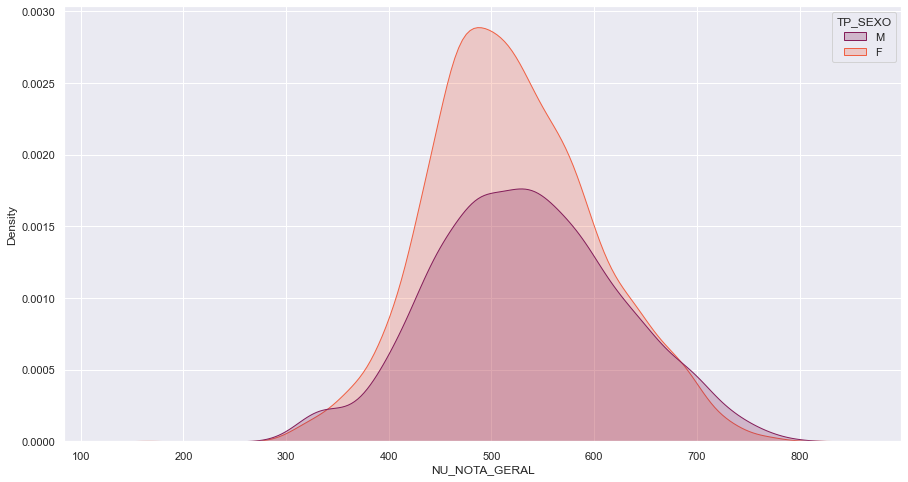

In [50]:
mean_vs_gender = ['NU_NOTA_GERAL', 'TP_SEXO']
sns.kdeplot(data=enem_df[mean_vs_gender], x='NU_NOTA_GERAL', fill=True, hue='TP_SEXO', palette="rocket")
plt.show()

In [69]:
means = enem_df.groupby(['TP_SEXO'])[['NU_NOTA_GERAL']].mean()
means

,NU_NOTA_GERAL
TP_SEXO,
F,520.596398
M,533.533993


# Média do desempenho por gênero na Redação

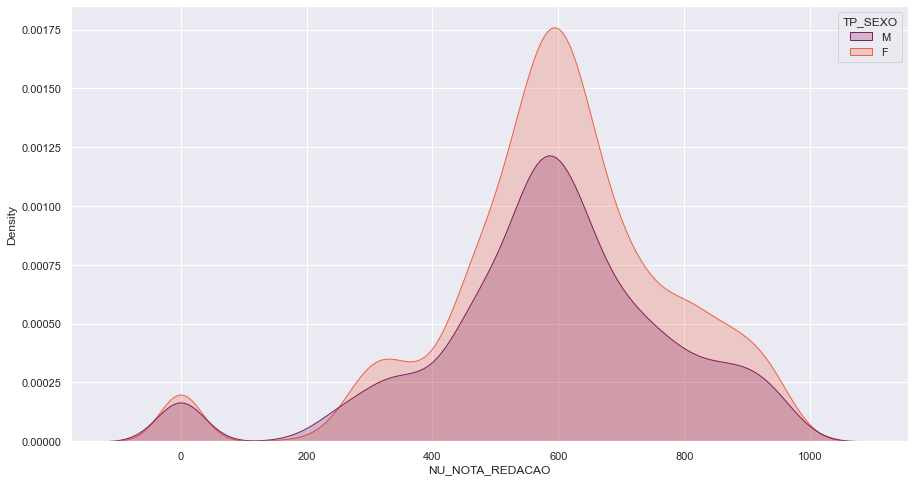

In [56]:
mean_vs_gender = ['NU_NOTA_REDACAO', 'TP_SEXO']
sns.kdeplot(data=enem_df[mean_vs_gender], x='NU_NOTA_REDACAO', fill=True, hue='TP_SEXO', palette="rocket")
plt.show()

# Verificando correlação entre o desempenho nas áreas 

A função .corr(), no modo padrão, calcula a correlação através do método Pearson. O coeficiente de Pearson varia de 1 a -1. Sendo:

1: correlação perfeita e positiva entre as variáveis

0: não existe correlação linear entre as variáveis

-1: correlação perfeita e negativa entre as variáveis

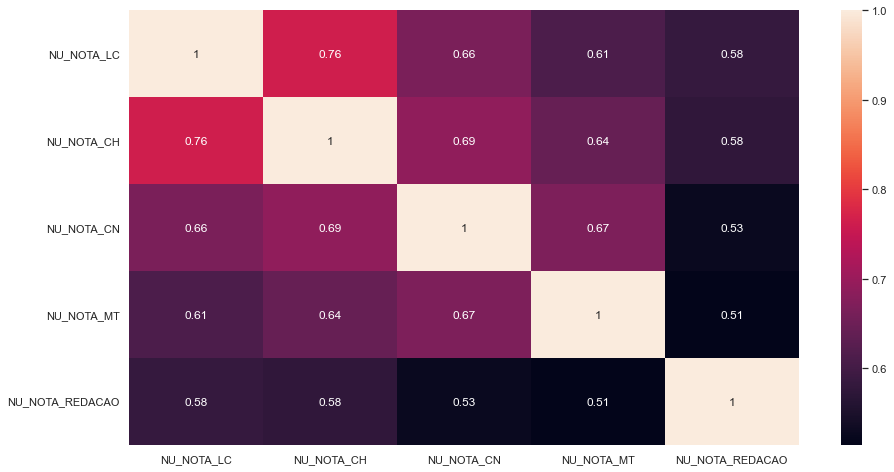

In [30]:
correlation_df = enem_df[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()

sns.heatmap(correlation_df, annot=True)
plt.show()

# Extraindo dados do Geopackage 

In [31]:
ufs_df = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')
ufs_df.head()

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


In [32]:
NOTA_UF = enem_df[['NU_NOTA_GERAL', 'SG_UF_RESIDENCIA']].copy()
NOTA_UF = NOTA_UF.groupby(by='SG_UF_RESIDENCIA').mean()
NOTA_UF

ufs_df.rename({'sigla': 'SG_UF_RESIDENCIA'}, axis=1, inplace=True)
ufs_df

BRASIL = ufs_df.merge(NOTA_UF, on='SG_UF_RESIDENCIA', how='left')

BRASIL[['SG_UF_RESIDENCIA', 'NU_NOTA_GERAL', 'geometry']].head()

,SG_UF_RESIDENCIA,NU_NOTA_GERAL,geometry
0,GO,534.543511,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,MS,526.168595,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,PR,532.911244,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,MG,540.867365,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,SE,522.611250,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


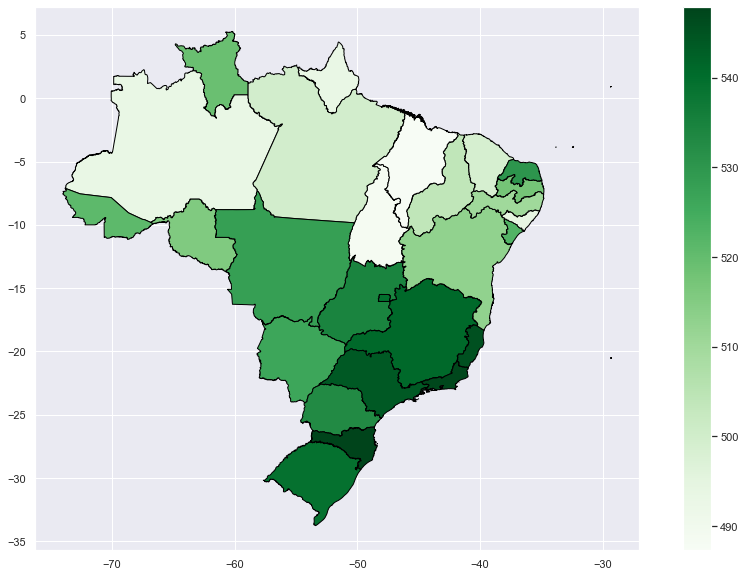

In [60]:
BRASIL.plot(column='NU_NOTA_GERAL',
          cmap='Greens',
          figsize=(16,10),
          legend=True,
          edgecolor='black')

plt.show()